# Charakterisierung der konvektiven Wolke zum Zeitpunkt mit Z=35 dBZ
Um ein Verständnis für eine gute Objektdefinition und die Wolkeneigenschaften zum Zeitpunkt des ersten Niederschlagssignals zu erhalten betrachten wir den Zeitpunkt mit Z=35dBZ in den Tracks der HACI-Objekte des Jahres 2013.

In [1]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

import glob

from analysis_tools import make_hrv_upscaling as mhu
from plotting_tools.colormaps import radar_cmap as rcmp
import scipy.ndimage as ndi

sys.path.append("/vols/satellite/home/lenk/utils/tracking")
import object_tracking as ot

import fixed_colourbar as fc
from skimage import color

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


ModuleNotFoundError: No module named 'object_tracking'

In [ ]:
data_path = "/vols/satellite/home/stephan/data/radar_track/trackdata/hires"

Wir sehen uns mal nur die wirklich schönen Fälle an. Das sind bloß 11 Stück, aber vielleicht helfen sie dem Verständnis weiter.

In [6]:
faelle = pd.read_csv("/vols/satellite/home/stephan/proj/2019-01_trackingstudie/schoene_faelle.txt")

In [7]:
print faelle

        track_id
0    20130618_88
1    20130608_94
2    20130721_42
3    20130722_22
4   20130730_541
5   20130804_126
6   20130804_133
7    20130806_83
8    20130806_93
9    20130809_22
10   20130817_06


Dann erzeugen wir uns die Pfade zu den Trackausschnitten.

In [10]:
paths = []
for i, row in faelle.iterrows():
    paths.append("{}/haci_trackdata_{}.nc".format(data_path,row.track_id))

In [11]:
faelle = faelle.assign(data_path = paths)

In [7]:
print faelle

        track_id                                          data_path
0    20130618_88  /vols/talos/home/stephan/data/radar_track/trac...
1    20130608_94  /vols/talos/home/stephan/data/radar_track/trac...
2    20130721_42  /vols/talos/home/stephan/data/radar_track/trac...
3    20130722_22  /vols/talos/home/stephan/data/radar_track/trac...
4   20130730_541  /vols/talos/home/stephan/data/radar_track/trac...
5   20130804_126  /vols/talos/home/stephan/data/radar_track/trac...
6   20130804_133  /vols/talos/home/stephan/data/radar_track/trac...
7    20130806_83  /vols/talos/home/stephan/data/radar_track/trac...
8    20130806_93  /vols/talos/home/stephan/data/radar_track/trac...
9    20130809_22  /vols/talos/home/stephan/data/radar_track/trac...
10   20130817_06  /vols/talos/home/stephan/data/radar_track/trac...


Dann sehen wir uns mal ein Beispiel an.

In [12]:
track_data = xr.open_dataset(faelle.data_path.iloc[0])

In [13]:
track_data

<xarray.Dataset>
Dimensions:    (time: 13, x: 153, y: 153)
Coordinates:
    lat        (x, y) float64 51.73 51.73 51.73 51.73 51.73 51.73 51.73 ...
    lon        (x, y) float64 12.14 12.16 12.17 12.19 12.21 12.22 12.24 ...
  * time       (time) datetime64[ns] 2013-06-18T12:25:00 2013-06-18T12:30:00 ...
Dimensions without coordinates: x, y
Data variables:
    hrv        (time, x, y) float64 0.2117 0.2074 0.2003 0.2004 0.2061 ...
    ir134      (time, x, y) float64 263.7 264.0 264.1 264.2 264.3 264.3 ...
    ir097_pc   (time, x, y) float64 259.7 259.6 259.7 259.9 260.2 260.5 ...
    ir108_pc   (time, x, y) float64 293.6 293.9 294.1 294.5 294.8 294.8 ...
    vis008_pc  (time, x, y) float64 0.3544 0.3409 0.3221 0.3046 0.2898 ...
    cma_pc     (time, x, y) float64 0.0 0.0 1.597e-22 1.614e-22 1.495e-22 ...
    ir016_pc   (time, x, y) float64 0.1926 0.194 0.1967 0.1995 0.2022 0.2008 ...
    ctp_pc     (time, x, y) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ir120      (time, x, 

Wie interessieren uns für den Zeitschritt wo das erste mal Z=35 dBZ erreicht wird. Das ist der siebente Zeitschritt.

Text(0.5,1,u'RADOLAN RX')

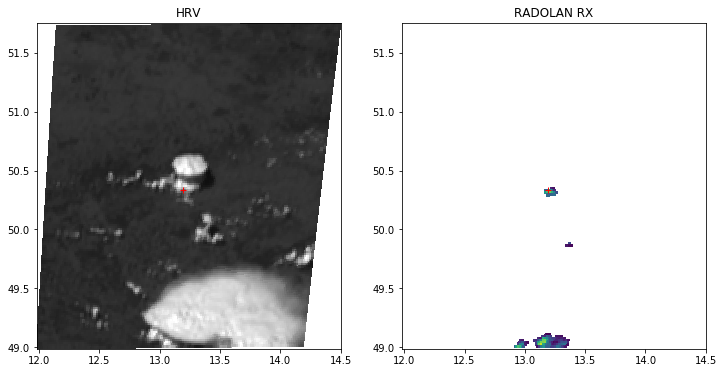

In [14]:
#fig,ax = plt.subplots(1,2,figsize=(12,6))
#ax[0].pcolormesh(track_data.hlon.data,track_data.hlat.data,
#                 track_data.hrv.data[7],
#                 vmin=0,vmax=1,cmap='gray')
#ax[0].plot(track_data.hlon.data[track_data.hlon.data.shape[0]//2,
#                                track_data.hlon.data.shape[1]//2],
#           track_data.hlat.data[track_data.hlat.data.shape[0]//2,
#                                track_data.hlat.data.shape[1]//2],
#           'r+')
#ax[0].set_title(u"HRV")

#ax[1].pcolormesh(track_data.rlon.data,track_data.rlat.data,
#                 np.ma.masked_less(track_data.z.data[7],35),
#              vmin=35,vmax=65)
#ax[1].plot(track_data.rlon.data[track_data.rlon.data.shape[0]//2,
#                                track_data.rlon.data.shape[1]//2],
#           track_data.rlat.data[track_data.rlat.data.shape[0]//2,
#                                track_data.rlat.data.shape[1]//2],
#           'r+')
#ax[1].set_title(u"RADOLAN RX")

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].pcolormesh(track_data.lon.data,track_data.lat.data,
                 track_data.hrv.data[7],
                 vmin=0,vmax=1,cmap='gray')
ax[0].plot(track_data.lon.data[track_data.lon.data.shape[0]//2,
                                track_data.lon.data.shape[1]//2],
           track_data.lat.data[track_data.lat.data.shape[0]//2,
                                track_data.lat.data.shape[1]//2],
           'r+')
ax[0].set_title(u"HRV")

ax[1].pcolormesh(track_data.lon.data,track_data.lat.data,
                 np.ma.masked_less(track_data.z.data[7],35),
              vmin=35,vmax=65)
ax[1].plot(track_data.lon.data[track_data.lon.data.shape[0]//2,
                                track_data.lon.data.shape[1]//2],
           track_data.lat.data[track_data.lat.data.shape[0]//2,
                                track_data.lat.data.shape[1]//2],
           'r+')
ax[1].set_title(u"RADOLAN RX")

Wir haben hier ein Wolkenfeld mit mehren konvektiven Wolken, die Niederschlag produzieren. Uns interessiert aber nur die Wolke in der Mitte des Ausschnitts.

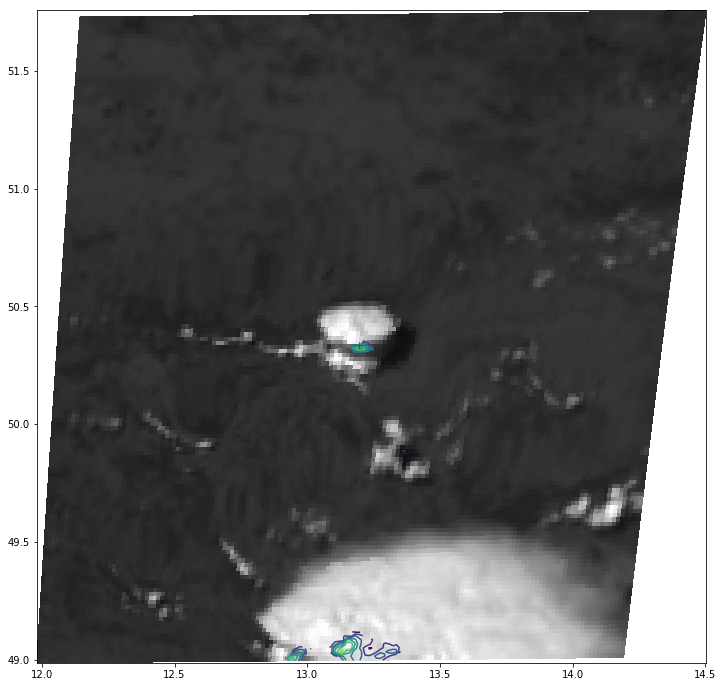

In [15]:
#fig,ax = plt.subplots(1,1,figsize=(12,12))
#ax.pcolormesh(track_data.hlon.data,track_data.hlat.data,
#                 track_data.hrv.data[7],
#                 vmin=0,vmax=1,cmap='gray')
#ax.plot(track_data.hlon.data[track_data.hlon.data.shape[0]//2,
#                                track_data.hlon.data.shape[1]//2],
#           track_data.hlat.data[track_data.hlat.data.shape[0]//2,
#                                track_data.hlat.data.shape[1]//2],
#           'r+')
#ax.contour(track_data.rlon.data,track_data.rlat.data,
#           np.ma.masked_less(track_data.z.data[7],35),
#           vmin=35,vmax=65)
#ax.plot(track_data.rlon.data[track_data.rlon.data.shape[0]//2,
#                                track_data.rlon.data.shape[1]//2],
#           track_data.rlat.data[track_data.rlat.data.shape[0]//2,
#                                track_data.rlat.data.shape[1]//2],
#           'g+')

fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.pcolormesh(track_data.lon.data,track_data.lat.data,
                 track_data.hrv_pc.data[7],
                 vmin=0,vmax=1,cmap='gray')
ax.plot(track_data.lon.data[track_data.lon.data.shape[0]//2,
                            track_data.lon.data.shape[1]//2],
        track_data.lat.data[track_data.lat.data.shape[0]//2,
                            track_data.lat.data.shape[1]//2],
           'r+')
ax.contour(track_data.lon.data,track_data.lat.data,
           np.ma.masked_less(track_data.z.data[7],35),
           vmin=35,vmax=65)
ax.plot(track_data.lon.data[track_data.lon.data.shape[0]//2,
                            track_data.lon.data.shape[1]//2],
        track_data.lat.data[track_data.lat.data.shape[0]//2,
                            track_data.lat.data.shape[1]//2],
           'g+')

Mal sehen, ob wir diese Wolke vom Rest trennen können, um ihre Eigenschaften zu berachten.

In [23]:
cma_hrv = mhu.make_hrv_upscaling(track_data.cma[7].data)

In [24]:
#hrv_masked = np.ma.masked_where(cma_hrv<2, track_data.hrv[7].data)
hrv_masked = np.ma.masked_where(track_data.cma[6].data<1, track_data.hrv_pc[6].data)

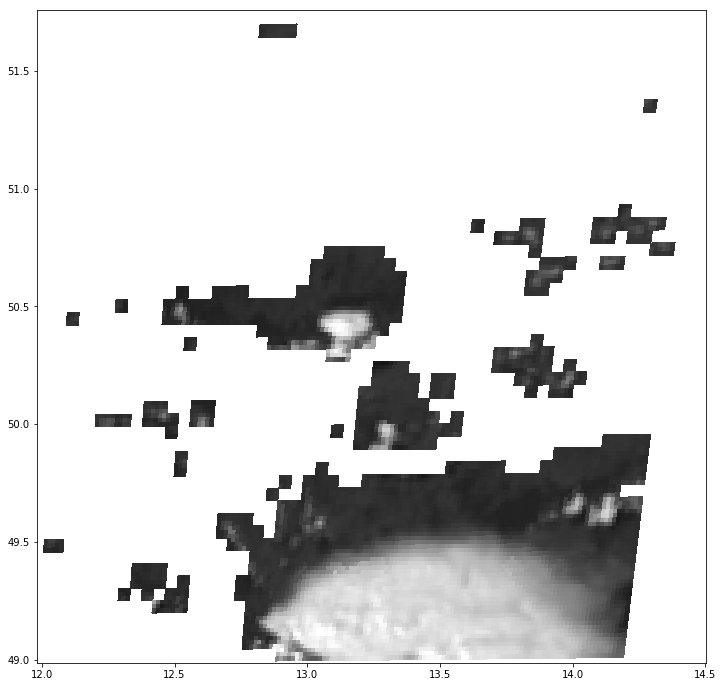

In [25]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.pcolormesh(track_data.lon.data,track_data.lat.data,
               hrv_masked,
                 vmin=0,vmax=1,cmap='gray')

Das sieht schonmal garnicht so schlecht aus. Am besten sehen wir uns mal ein Histogramm der Reflektanz dess Ausschnittes an, um eventuell einen geeigneten Schwellwert zu finden.

(array([  16.,   29.,  528., 2107., 4736., 6528., 5032.,  878.,  228.,
         198.,  147.,  123.,   84.,   90.,   73.,   79.,   53.,   57.,
          64.,   39.,   47.,   54.,   49.,   43.,   48.,   57.,   46.,
          52.,   44.,   46.,   35.,   45.,   44.,   50.,   53.,   70.,
          91.,   89.,  139.,  159.,  214.,  241.,  192.,  140.,   87.,
          64.,   41.,   26.,   27.,   20.]),
 array([0.08330744, 0.1016413 , 0.11997515, 0.138309  , 0.15664285,
        0.1749767 , 0.19331055, 0.2116444 , 0.22997825, 0.2483121 ,
        0.26664596, 0.28497981, 0.30331366, 0.32164751, 0.33998136,
        0.35831521, 0.37664906, 0.39498291, 0.41331676, 0.43165062,
        0.44998447, 0.46831832, 0.48665217, 0.50498602, 0.52331987,
        0.54165372, 0.55998757, 0.57832142, 0.59665528, 0.61498913,
        0.63332298, 0.65165683, 0.66999068, 0.68832453, 0.70665838,
        0.72499223, 0.74332608, 0.76165994, 0.77999379, 0.79832764,
        0.81666149, 0.83499534, 0.85332919, 0.87166304, 

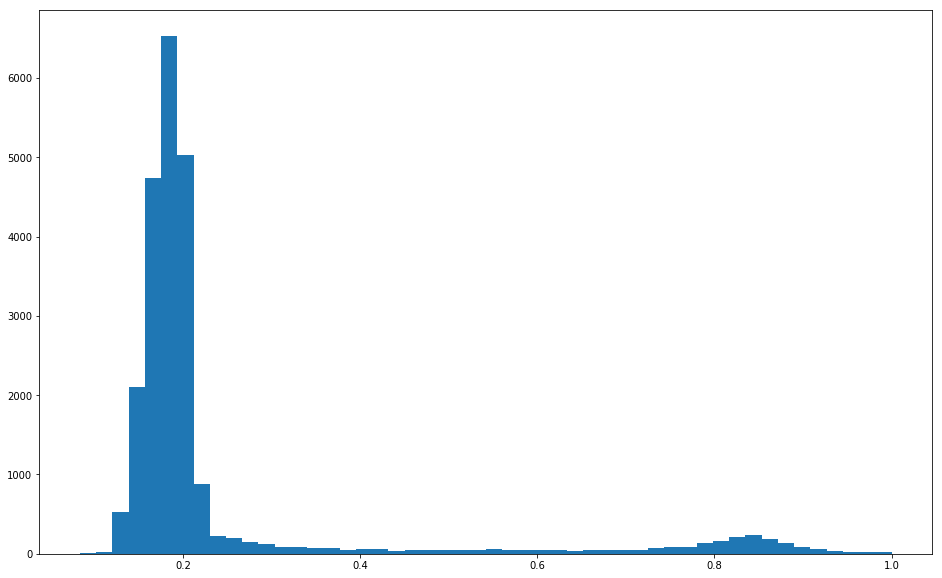

In [26]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.hist(hrv_masked.ravel(),bins=50)

Es ist kein eindeutiger Wert erkennbar, aber vielleicht hilft eine Glättung.

In [27]:
hrv_smooth = ndi.filters.gaussian_filter(track_data.hrv[7].data,2)

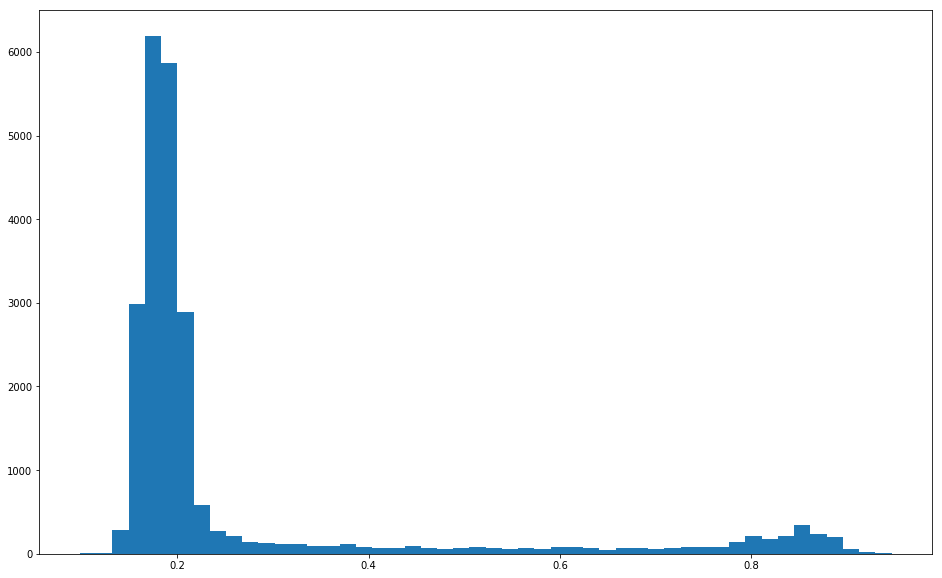

In [28]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
bv= ax.hist(hrv_smooth.ravel(),bins=50)

Das hilft auch nicht weiter. Dann versuchen wir es mal mit einer Iteration über mögliche Schwellwerte.

In [29]:
hrv_thresholds = np.arange(0,1,0.1)

hrv_m = dict()

for ht in hrv_thresholds:
    hrv_m[ht] = np.ma.masked_less(hrv_smooth,ht)

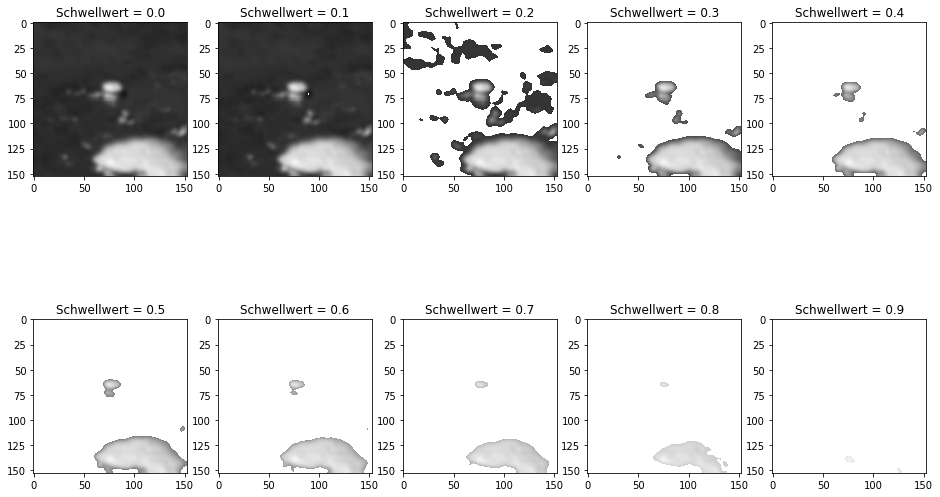

In [30]:
fig,ax = plt.subplots(2,5,figsize=(16,10))
axs = ax.ravel()

for i,k in enumerate(sorted(hrv_m.keys())):
    axs[i].imshow(hrv_m[k],vmin=0,vmax=1,cmap='gray')
    axs[i].set_title(u"Schwellwert = {th}".format(th=k))

Es sieht so aus, als könnten 0,2 oder 0,3 vernünftige Schwellwerte sein. Bei 0,3 sind die Wolkenobjekte besser trennbar, aber man erhält nur die inneren Wolkenbereiche. Eventuell kann hier ein Hystereseschwellwertverfahren weiterhelfen.

In [19]:
ir_thresholds = np.arange(270,230,-10)

In [29]:
def array_to_256(array):
    return (array*255.999).astype("uint8")

def day_natural_composite(vis006_data,vis008_data,nir016_data,factor=1,gamma=1):
    blue = array_to_256(np.clip(vis006_data/factor,0,1)**(1./gamma))
    green = array_to_256(np.clip(vis008_data/factor,0,1)**(1./gamma))
    red = array_to_256(np.clip(nir016_data/factor,0,1)**(1./gamma))
    
    return np.dstack([red,green,blue]).astype("uint8")

def scale_array_min_max(array_data,range_min=0,range_max=1):
    """
    Scales a array into the chosen range.
    
    Inputs:
    -------
    array_data: numpy array of floats or integers, 2d
        array to scale
    range_min: int or float, default = 0
        minimum value of the range to scale array to,
    range_max: int or float, default = 1
        maximum value of the range to scale array to,
        
    Returns:
    --------
    scaled_array: numpy array of floats, 2d
    """
    # get array extrema
    array_min = np.min(array_data)
    array_max = np.max(array_data)

    # derive conversion parameters
    a = (range_max - range_min) / (array_max - array_min)
    b = range_max - a * array_max

    # scale array
    scaled_array = a * array_data + b
    
    return scaled_array

def add_hrv_texture2nc(nc,hrv):
    nc_lab = color.rgb2lab(nc)
    l_min = nc_lab[...,0].min()
    l_max = nc_lab[...,0].max()
    
    l_hrv_scaled = nc_lab[...,0] * hrv
    l_hrv_scaled = scale_array_min_max(l_hrv_scaled,l_min,l_max)

    nc_lab[...,0] = l_hrv_scaled
    
    return color.lab2rgb(nc_lab)

In [21]:
nc_composits = []

for i in xrange(len(track_data.ir108.data)):
    nc = day_natural_composite(track_data.vis006.data[i],
                               track_data.vis008.data[i],
                               track_data.ir016.data[i],0.9,1.8)
    
    nc_composits.append(nc)
    
nc_composits_pc = []

for i in xrange(len(track_data.ir108.data)):
    nc = day_natural_composite(track_data.vis006_pc.data[i],
                               track_data.vis008_pc.data[i],
                               track_data.ir016_pc.data[i],0.9,1.8)
    
    nc_composits_pc.append(nc)

In [31]:
ir_masked = {i:{th:[] for th in ir_thresholds} for i,t in enumerate(track_data.time.data)}

for i in xrange(len(track_data.ir108.data)):
    ir_data = track_data.ir108_pc.data[i]
    for th in ir_thresholds:
        ir_masked[i][th] = np.ma.masked_greater(ir_data,th)

In [23]:
from skimage import measure
import matplotlib as mpl

In [24]:
cmap = mpl.cm.get_cmap('Spectral')
norm = mpl.colors.Normalize(vmin=230, vmax=270)

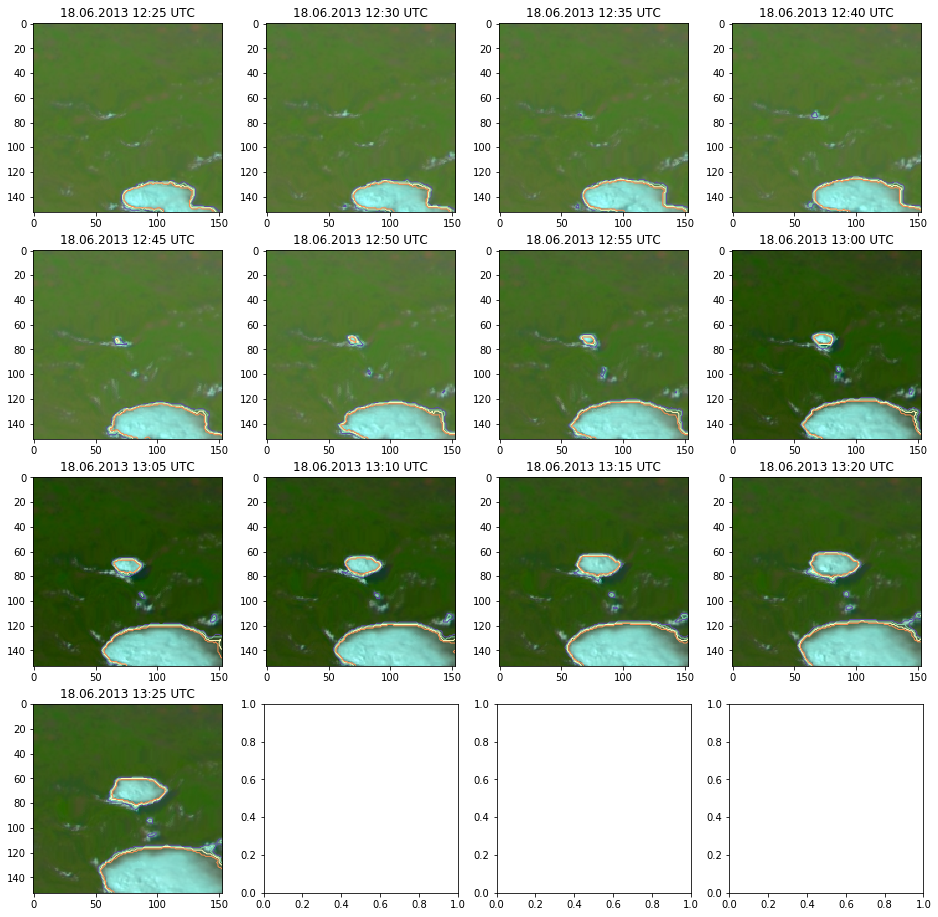

In [33]:
fig,ax = plt.subplots(4,4,figsize=(16,16))
axs = ax.ravel()

contours = {t:[] for t in ir_thresholds}
for i, ir in enumerate(track_data.ir108.data):
    axs[i].imshow(add_hrv_texture2nc(nc_composits_pc[i],track_data.hrv_pc[i]))
    axs[i].set_title(pd.Timestamp(track_data.time.data[i]).strftime("%d.%m.%Y %H:%M UTC"))
    
    for th in ir_thresholds:
        data = ~ir_masked[i][th].mask*1
        cont = measure.find_contours(data, 0.99)
        
        for n, contour in enumerate(cont):
            axs[i].plot(contour[:, 1], contour[:, 0], linewidth=1,color=cmap(norm(th)))

In [20]:
faelle

track_id                                          data_path
0    20130618_88  /vols/talos/home/stephan/data/radar_track/trac...
1    20130608_94  /vols/talos/home/stephan/data/radar_track/trac...
2    20130721_42  /vols/talos/home/stephan/data/radar_track/trac...
3    20130722_22  /vols/talos/home/stephan/data/radar_track/trac...
4   20130730_541  /vols/talos/home/stephan/data/radar_track/trac...
5   20130804_126  /vols/talos/home/stephan/data/radar_track/trac...
6   20130804_133  /vols/talos/home/stephan/data/radar_track/trac...
7    20130806_83  /vols/talos/home/stephan/data/radar_track/trac...
8    20130806_93  /vols/talos/home/stephan/data/radar_track/trac...
9    20130809_22  /vols/talos/home/stephan/data/radar_track/trac...
10   20130817_06  /vols/talos/home/stephan/data/radar_track/trac...

In [21]:
test = xr.open_dataset(faelle.iloc[0].data_path)

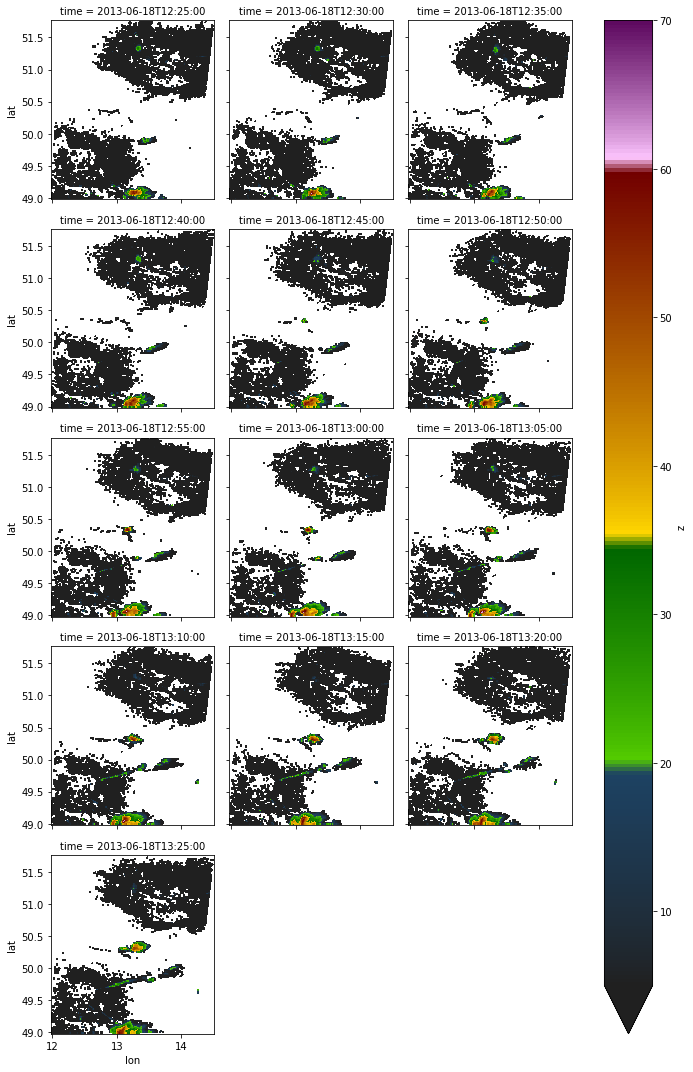

In [29]:
test.z.plot(x='lon',y='lat',col='time',col_wrap=3,vmin=5,vmax=70,cmap=rcmp())

In [34]:
nc_t0 = dict()
ir_t0 = dict()
hrv_t0 = dict()
ct_t0 = dict()
cth_t0 = dict()
z_t0 = dict()


for i,row in faelle.iterrows():
    try:
        with xr.open_dataset(row.data_path) as track_data:
            nc = day_natural_composite(track_data.vis006_pc.data[6],
                                       track_data.vis008_pc.data[6],
                                       track_data.ir016_pc.data[6],0.9,1.8)

            nc_t0[row.track_id] = nc
            ir_t0[row.track_id] = track_data.ir108.data[6]
            hrv_t0[row.track_id] = track_data.hrv_pc.data[6]
            ct_t0[row.track_id] = track_data.ct.data[6]
            cth_t0[row.track_id] = track_data.cth.data[6]
            z_t0[row.track_id] = track_data.z.data[6]
    except:
        continue

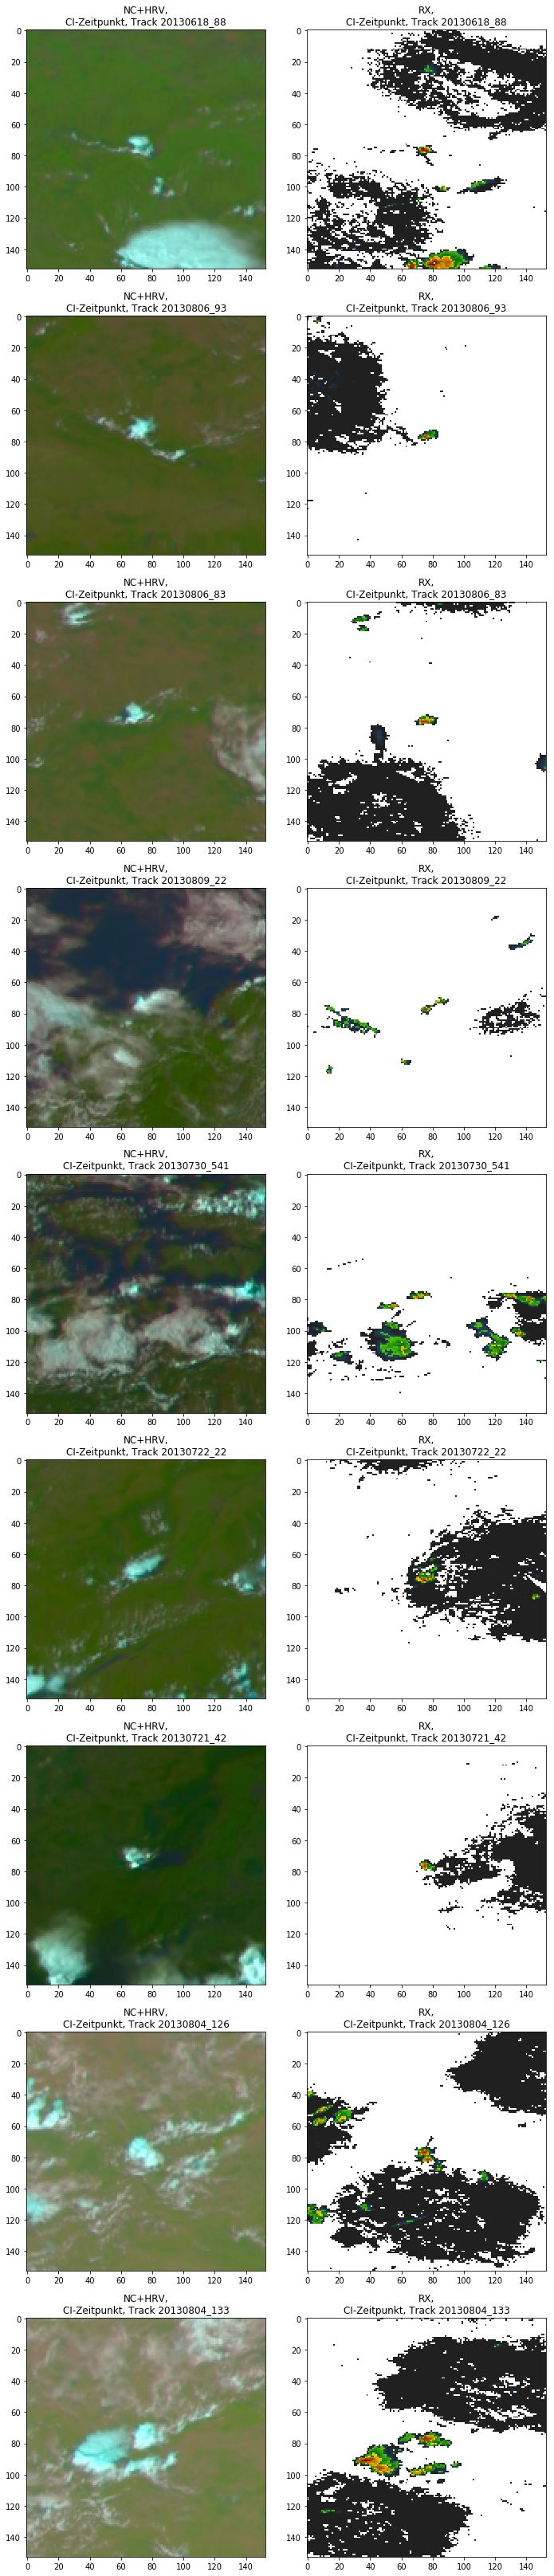

In [35]:
fig,ax = plt.subplots(9,2,figsize=(10,45))
for i,k in enumerate(nc_t0.keys()):
    ax[i,0].imshow(add_hrv_texture2nc(nc_t0[k],hrv_t0[k]))
    #ax[i,0].imshow(hrv_t0[k],vmin=0,vmax=1,cmap='gray',alpha=0.6)
    ax[i,0].set_title("NC+HRV,\nCI-Zeitpunkt, Track {}".format(k))
    ax[i,1].imshow(z_t0[k],vmin=5,vmax=70,cmap=rcmp())
    ax[i,1].set_title("RX,\nCI-Zeitpunkt, Track {}".format(k))
    
plt.tight_layout()
plt.savefig("/vols/talos/home/stephan/proj/2019-01_trackingstudie/pics/nc_hrv_beste_faelle_t_ci.png")

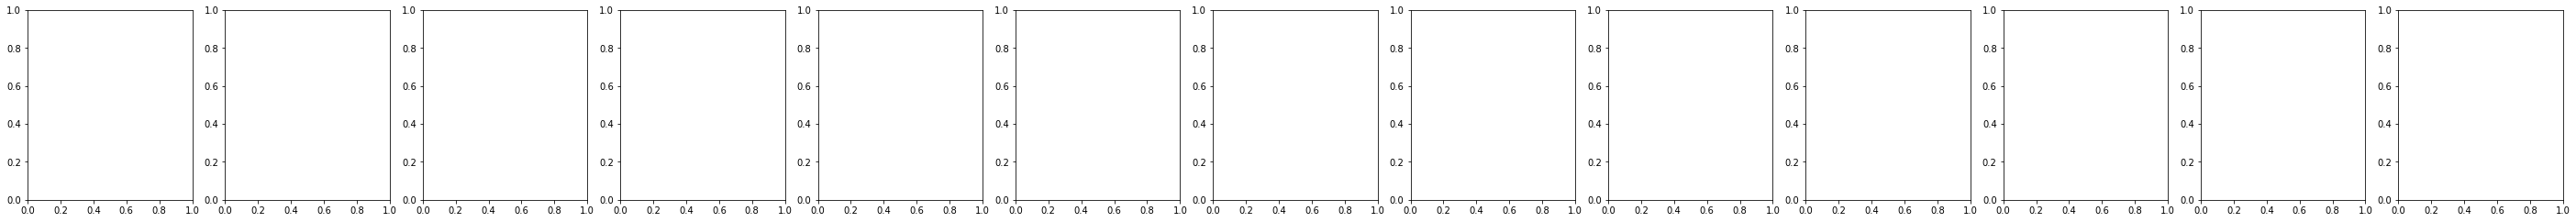

In [221]:
fs = 1.27 *3 
for i,row in faelle.iterrows():
    try:
        fig, ax = plt.subplots(1,13,figsize=(13*fs,fs))
        
        with xr.open_dataset(row.data_path) as track_data:
            for j in xrange(len(track_data.ir108.data)):
                nc= day_natural_composite(track_data.vis006_pc.data[j],
                                          track_data.vis008_pc.data[j],
                                          track_data.ir016_pc.data[j],0.9,2)
                
                ax[j].imshow(add_hrv_texture2nc(nc,track_data.hrv_pc.data[j]))
                ax[j].imshow(np.ma.masked_less(track_data.z.data[j],5),vmin=5,vmax=70,cmap=rcmp(),alpha=0.65)

                ax[j].set_title("t = {} min\n{}".format(j*5-30,track_data.time.data[j]))
        
        #fig.suptitle("Track {}".format(row.track_id))
        plt.tight_layout()
        plt.savefig("/vols/talos/home/stephan/proj/2019-01_trackingstudie/pics/nc_rgbs/gut/{}.png".format(row.track_id))
        plt.close("all")
    except:
        continue

In [40]:
def array_to_256(array):
    return (array*255.999).astype("uint8")

def day_natural_composite(vis006_data,vis008_data,nir016_data,factor=1,gamma=1):
    blue = array_to_256(np.clip(vis006_data/factor,0,1)**(1./gamma))
    green = array_to_256(np.clip(vis008_data/factor,0,1)**(1./gamma))
    red = array_to_256(np.clip(nir016_data/factor,0,1)**(1./gamma))
    
    return np.dstack([red,green,blue]).astype("uint8")

In [188]:
test = xr.open_dataset("/vols/talos/home/stephan/proj/2019-01_trackingstudie/hires_files/calibrated/msg2-sevi-20130809T1200Z-hr-cal-vap-rss.de.c3.nc")

In [215]:
nc = day_natural_composite(test.vis006.data,
                           test.vis008.data,
                           test.ir_016.data,0.8,2)
res =  add_hrv_texture2nc(nc,test.hrv.data)   

Text(0.5,1,'Tag-NC + HRV')

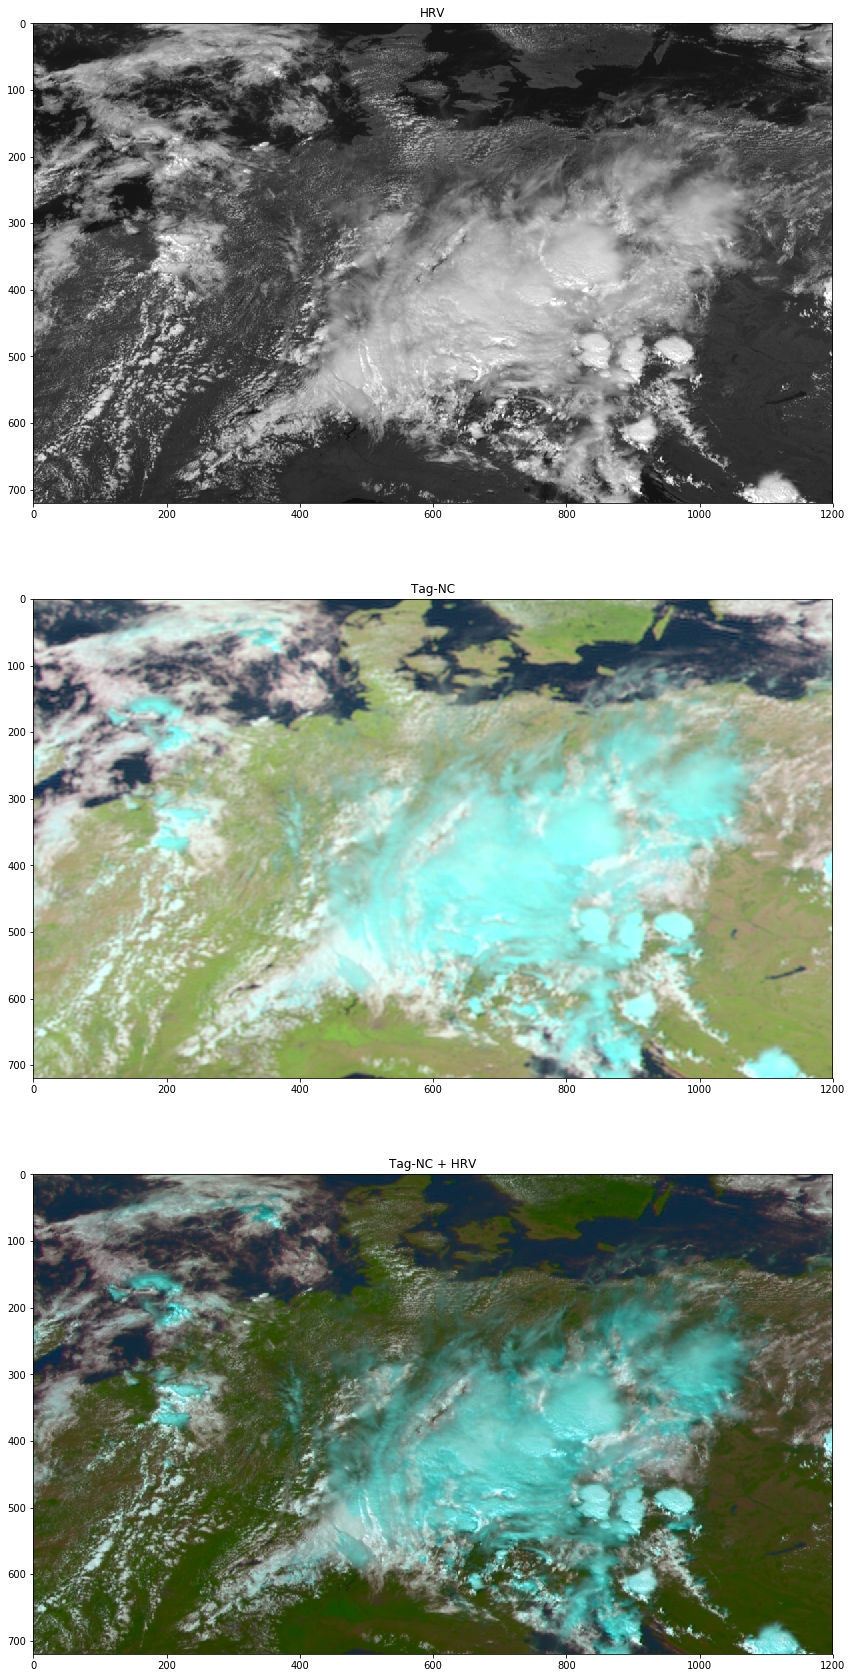

In [216]:
fig,ax = plt.subplots(3,1,figsize=(16,30))
ax[0].imshow(test.hrv.data,vmin=0,vmax=1,cmap='gray')
ax[0].set_title("HRV")
ax[1].imshow(nc)
ax[1].set_title("Tag-NC")
ax[2].imshow(res)
ax[2].set_title("Tag-NC + HRV")

In [53]:
nc_composits = []

for i in xrange(len(track_data.ir108.data)):
    nc = day_natural_composite(track_data.vis006.data[i],
                               track_data.vis008.data[i],
                               track_data.ir016.data[i],0.9,1.8)
    
    nc_composits.append(nc)
    
nc_composits_pc = []

for i in xrange(len(track_data.ir108.data)):
    nc = day_natural_composite(track_data.vis006_pc.data[i],
                               track_data.vis008_pc.data[i],
                               track_data.ir016_pc.data[i],0.9,1.8)
    
    nc_composits_pc.append(nc)

AssertionError: internal failure: file must be open if `autoclose=True` is used.

Text(0.5,1,'NC-Komposit und RADOLAN, 18.06.2013 12:55 UTC,\nmit Parallaxenkorektur')

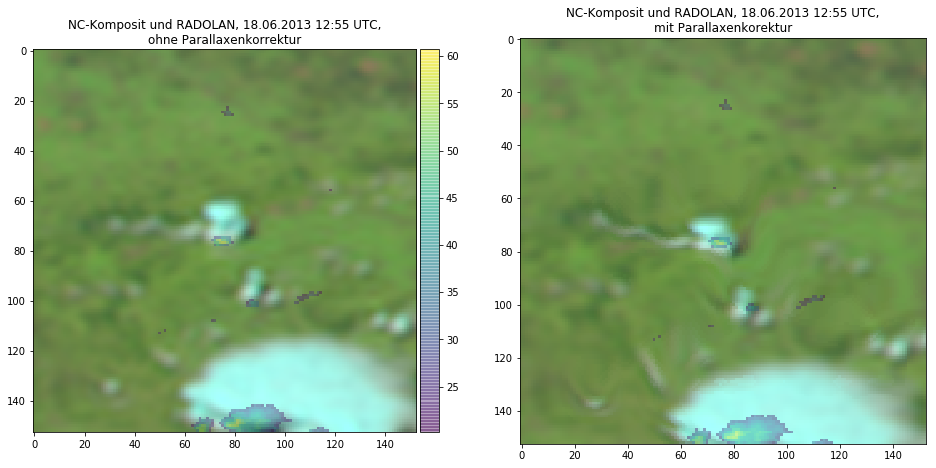

In [61]:
t  = pd.Timestamp(track_data.time.data[6])
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(nc_composits[6])
z_plot0  = ax[0].imshow(np.ma.masked_less(track_data.z.data[6],20),alpha=0.4)
ax[0].set_title("NC-Komposit und RADOLAN, {},\nohne Parallaxenkorrektur".format(t.strftime("%d.%m.%Y %H:%M UTC")))
fc.colourbar(z_plot0)

ax[1].imshow(nc_composits_pc[6])
ax[1].imshow(np.ma.masked_less(track_data.z.data[6],20),alpha=0.4)
ax[1].set_title("NC-Komposit und RADOLAN, {},\nmit Parallaxenkorektur".format(t.strftime("%d.%m.%Y %H:%M UTC")))

In [31]:
sys.path.append("/vols/talos/home/stephan/utils/tracking/")
import object_tracking as ot

In [32]:
hrv_seg = ot.apply_hysteresis_threshold(hrv_smooth,0.3,0.4)

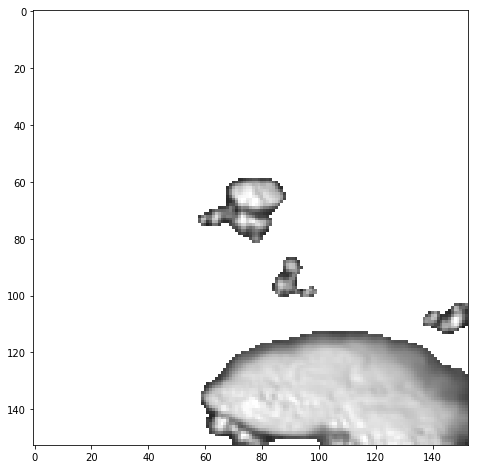

In [33]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(np.ma.masked_where(hrv_seg<1,track_data.hrv[7].data),vmin=0,vmax=1,cmap='gray')

Als nächstes markieren wir die Objekte.

In [34]:
object_labels, nobject = ndi.label(hrv_seg)

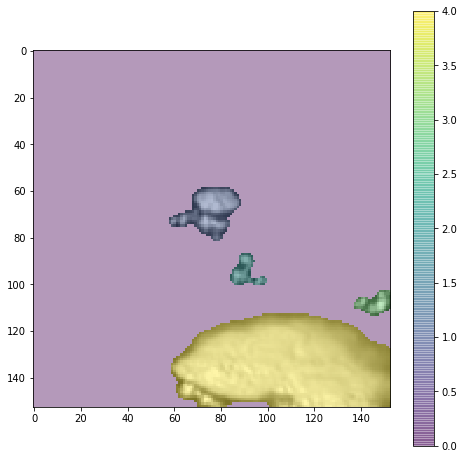

In [35]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(np.ma.masked_where(hrv_seg<1,track_data.hrv[7].data),vmin=0,vmax=1,cmap='gray')
lab_plot = ax.imshow(object_labels,alpha=0.4)
fig.colorbar(lab_plot)

Das Objekt mit der Markierung 1 scheint unser gesuches Objekt zu sein.

In [36]:
objekt_mask = np.ma.masked_less(np.ma.masked_greater(object_labels,1),1)

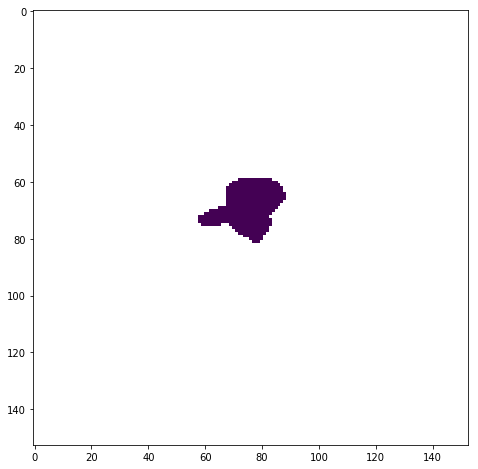

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(objekt_mask)

Als nächstes schneiden wir diesen Bereich auch aus anderen Daten als dem HRV-Kanal aus und sehen uns an, wie diese Daten aussehen.

In [38]:
import geooperations as go
objekt_mask_lowres = go.remap_grid(objekt_mask,track_data.hlon.data,track_data.hlat.data,track_data.lon.data,
                                   track_data.lat.data,1)
objekt_mask_rado = go.remap_grid(objekt_mask,track_data.hlon.data,track_data.hlat.data,track_data.rlon.data,
                                   track_data.rlat.data,1)

AttributeError: 'Dataset' object has no attribute 'hlon'

Text(0.5,1,u'Objektmaske, RADOLAN-Aufl\xf6sung')

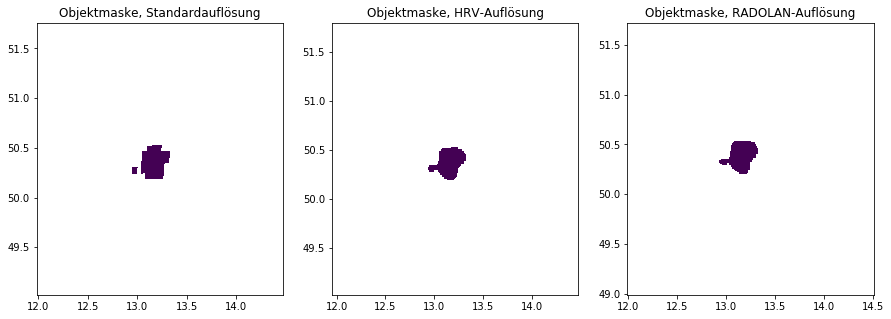

In [39]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].pcolormesh(track_data.lon.data,track_data.lat.data,objekt_mask_lowres)
ax[0].set_title(u"Objektmaske, Standardauflösung")
ax[1].pcolormesh(track_data.hlon.data,track_data.hlat.data,objekt_mask)
ax[1].set_title(u"Objektmaske, HRV-Auflösung")
ax[2].pcolormesh(track_data.rlon.data,track_data.rlat.data,objekt_mask_rado)
ax[2].set_title(u"Objektmaske, RADOLAN-Auflösung")

In [40]:
cutouts = dict()

for k in track_data.keys():
    if k not in ['hlat','hlon','rlat','rlon','lat','lon','time']:
        if k in ['hrv','fld']:
            mask = objekt_mask
        elif k in ['z']:
            mask = objekt_mask_rado
        else:
            mask = objekt_mask_lowres

        cutouts[k] = np.ma.masked_where(mask!=1,track_data[k].data[7]).ravel()

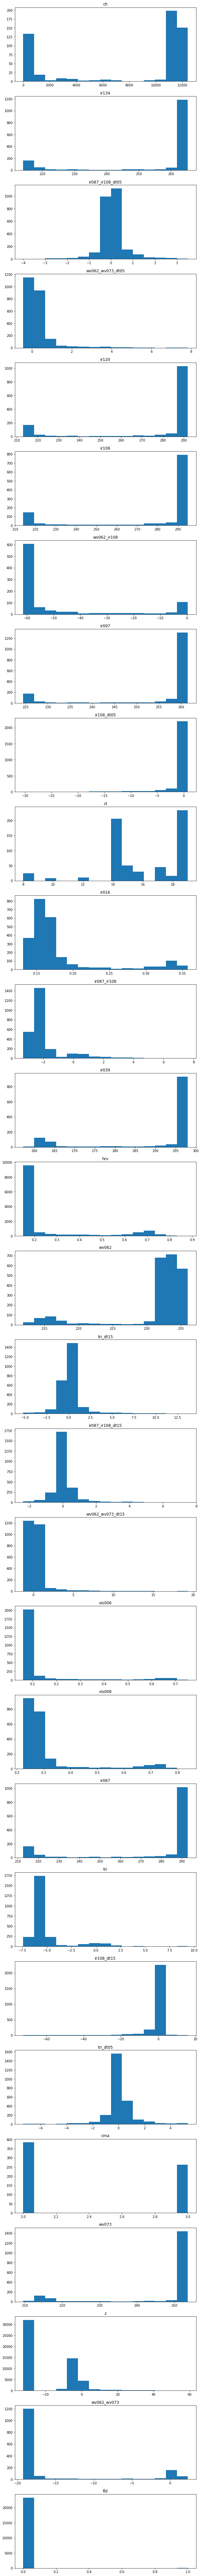

In [41]:
fig,ax = plt.subplots(len(cutouts.keys()),1,figsize=(10,5*len(cutouts.keys())))
axs=ax.ravel()
mean_properties = dict()
min_properties = dict()
max_properties = dict()
for i,k in enumerate(cutouts.keys()):
    bv,axs[i].hist(cutouts[k],bins=15) 
    axs[i].set_title(k)
    
    mean_properties[k] = np.nanmean(cutouts[k])
    max_properties[k] = np.nanmax(cutouts[k])
    min_properties[k] = np.nanmin(cutouts[k])

In [28]:
print ("min: {}\n\nmean: {}\n\nmax: {}".format(min_properties, mean_properties, max_properties))

min: {u'ch': 1400.0, u'ir134': 237.01999433144547, u'ir087_ir108_dt05': -2.3349304199218466, u'wv062_wv073_dt05': -0.831657107862867, u'ir120': 240.64148910163112, u'ir108': 238.55795288085938, u'wv062_ir108': -57.11390956962626, u'ir097': 239.23265856398976, u'ir108_dt05': -9.346649169921875, u'ct': 6.0, u'ir016': 0.12923314129752464, u'ir087_ir108': -2.9071696720873206, u'ir039': 263.779743552512, u'hrv': 0.2130677120463539, u'wv062': 224.992971329802, u'tri_dt15': -2.666607841881614, u'ir087_ir108_dt15': -1.212141055334996, u'wv062_wv073_dt15': -0.39692729747315525, u'vis006': 0.08611181731861789, u'vis008': 0.1665313291274212, u'ir087': 243.88695260480245, u'tri': -7.18840652777925, u'ir108_dt15': -20.214691162109375, u'z': -32.5, u'cma': 2.0, u'wv073': 232.64390262558123, u'tri_dt05': -3.6760973427576005, u'wv062_wv073': -20.421666397009687, u'fld': 0.0}

mean: {u'ch': 6840.0, u'ir134': 252.60277919988965, u'ir087_ir108_dt05': 0.24473305568984927, u'wv062_wv073_dt05': 0.6527405045

## Sementieung mittels morphologischer Rekonstruktion

In [42]:
data_seg = [ot.segment_morphological_reconstruction(h,'max',0.10) for h in track_data.hrv.data]

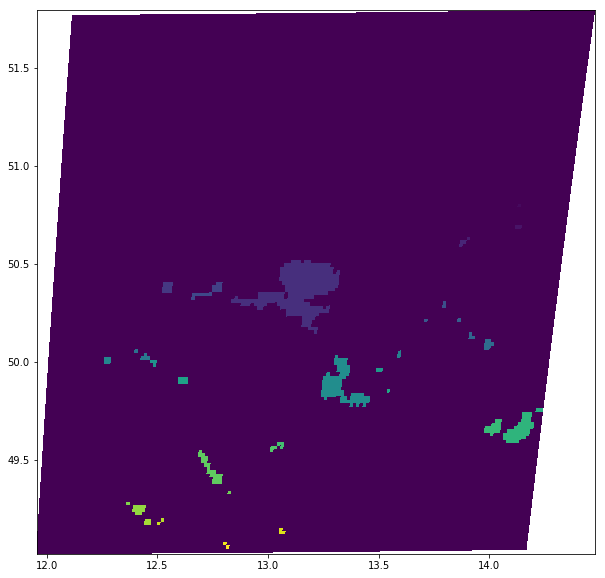

In [43]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.pcolormesh(track_data.hlon,track_data.hlat,data_seg[7])

In [44]:
obj = ot.get_wanted_object_id(data_seg)

In [45]:
obj

9

In [46]:
obj = ot.extracted_wanted_object_from_field(track_data.hrv.data,'max',0.1)

In [47]:
obj

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

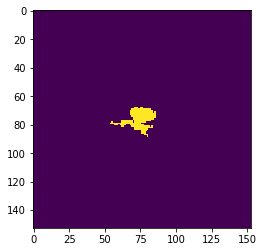

In [48]:
plt.imshow(obj[7])

In [51]:
obj_subsampled = np.array([o[::3,::3] for o in obj])

In [52]:
obj_ir = ot.extracted_wanted_object_from_field(track_data.ir108.data,'min',-1)

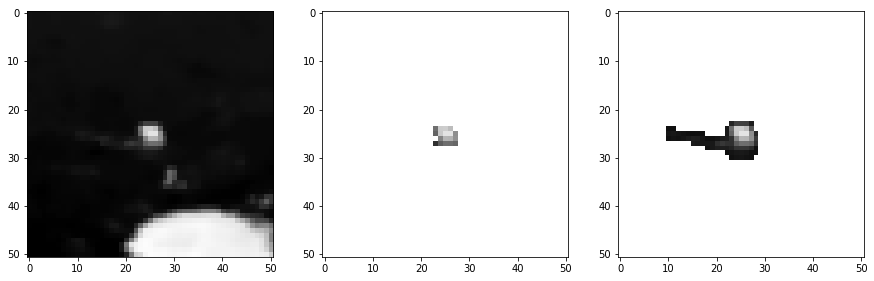

In [53]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(track_data.ir108.data[6],vmin=210,vmax=300,cmap='gray_r')
ax[1].imshow(np.ma.masked_where(obj_subsampled[6]<1, track_data.ir108.data[6]),vmin=210,vmax=300,cmap='gray_r')
ax[2].imshow(np.ma.masked_where(obj_ir[6]<1, track_data.ir108.data[6]),vmin=210,vmax=300,cmap='gray_r')

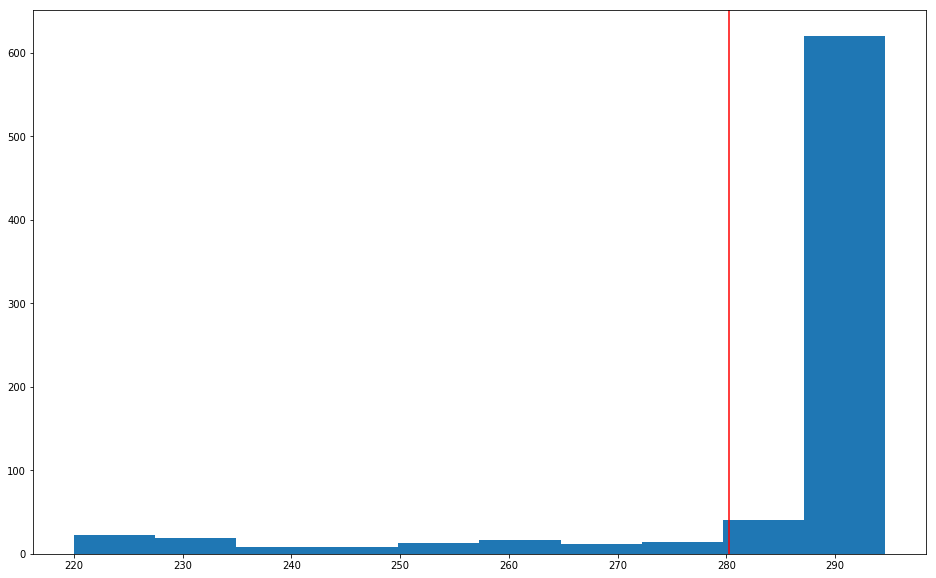

In [54]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
xy = ax.hist(np.ma.masked_where(obj_ir[6]<1, track_data.ir108.data[6]).ravel())
ax.axvline(x = np.nanmean(track_data.ir108.data[6][np.where(obj_ir[6]==1)]),color='red')

{'boxes': [<matplotlib.lines.Line2D at 0x7f882d1d7c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f882d1c4510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f882d19c090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f882d1c4c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f882d1d7d50>,
  <matplotlib.lines.Line2D at 0x7f882d1c4150>]}

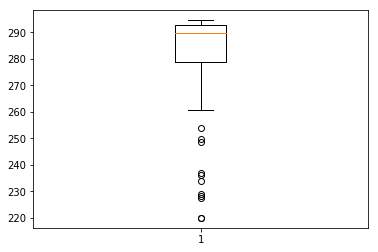

In [55]:
plt.boxplot(track_data.ir108.data[6][np.where(obj_ir[6]==1)].ravel())

In [56]:
data = []
time = []
mean = []

for i, o in enumerate(obj_subsampled):
    d = track_data.ir108.data[i][np.where(o==1)].ravel()
    
    data.extend(d)
    time.extend([i*5-30]*len(d))
    mean.append(np.mean(d))

In [58]:
track_id = "{}_{}".format(faelle.track_id.iloc[0].split("/")[-1].split(".")[0].split("_")[-2],
                          faelle.track_id.iloc[0].split("/")[-1].split(".")[0].split("_")[-1])

In [59]:
print track_id

20130618_88


In [60]:
import pandas as pd
import seaborn as sns

In [64]:
print len(data), len(time), len(mean)

457 457 13


In [61]:
data_df = pd.DataFrame({'IR108':data,'t_rel':time,'mean':mean})

ValueError: arrays must all be same length

In [48]:
save_dir = "/vols/talos/home/stephan/proj/2019-01_trackingstudie/pics/track_plots/IR108_verlauf/"

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.boxplot(x='t_rel',y='IR108',ax=ax,data=data_df,palette=sns.color_palette("RdBu_r",13))
ax.set_xlabel("time relative to Z=35 dBZ / min")
ax.set_ylabel(r"$T_\mathrm{B}$ (10.8 $\mu m$)")
ax.set_title("Track {}".format(track_id))
plt.tight_layout()
plt.savefig("{}{}.pdf".format(save_dir,track_id))

In [46]:
plt.switch_backend("Agg")
import pandas as pd
import seaborn as sns

Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130722_45.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130722_71.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130722_93.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130722_95.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130723_94.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130723_103.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130724_134.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/ra

Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130620_140.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130623_13.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130701_44.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130701_61.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130702_69.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130702_82.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130703_92.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/r

Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130806_93.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130806_121.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130807_104.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130810_250.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130813_452.nc
Fehler min() arg is an empty sequence bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130824_114.nc
Fehler Could not interpret input 'area' bei Track /vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_20130906_155.nc


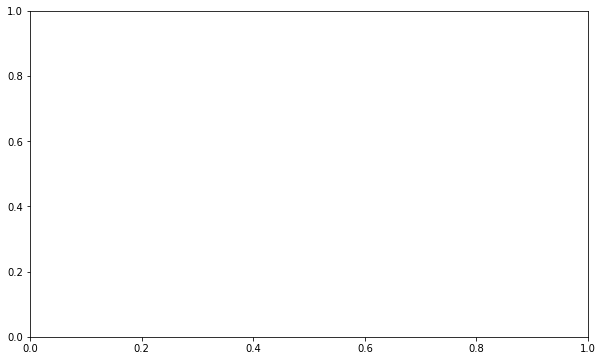

In [52]:
ir_ges = []
cth_ges =[]
time_ges = []
area_ges = []
ct_ges = []

for tr in track_paths:
    try:
        track_data = xr.open_dataset(tr)
        obj = ot.extracted_wanted_object_from_field(track_data.hrv.data,'max',0.1)
        obj_subsampled = np.array([o[::3,::3] for o in obj])

        track_id = "{}_{}".format(tr.split("/")[-1].split(".")[0].split("_")[-2],
                                  tr.split("/")[-1].split(".")[0].split("_")[-1])

        ir108 = []
        cth = []
        time = []
        area = []
        ct = []

        for i, o in enumerate(obj_subsampled):
            ir = track_data.ir108.data[i][np.where(o==1)].ravel()
            ch = track_data.ch.data[i][np.where(o==1)].ravel()
            c = track_data.ct.data[i][np.where(o==1)].ravel()

            ir108.extend(ir)
            cth.extend(ch)
            ct.extend(c)
            area.extend([len(ir)*18]*len(ir))
            time.extend([i*5-30]*len(ir))
            
        data_df = pd.DataFrame({'IR108':ir108,
                                't_rel':time,
                                'cth':cth,
                                'ct':ct,
                                'area':area})
        
        ir_ges.extend(ir108)
        time_ges.extend(time)
        cth_ges.extend(cth)
        ct_ges.extend(ct)
        area_ges.extend(area)
        
        fig,ax = plt.subplots(1,1,figsize=(10,6))
        sns.boxplot(x='t_rel',y='IR108',ax=ax,data=data_df,palette=sns.color_palette("RdBu_r",13))
        ax.set_xlabel("time relative to Z=35 dBZ / min")
        ax.set_ylabel(r"$T_\mathrm{B}$ (10.8 $\mu m$)")
        ax.set_title("Track {}".format(track_id))
        plt.tight_layout()
        plt.savefig("{}{}_ir108.pdf".format(save_dir,track_id))
        plt.close("all")

        fig,ax = plt.subplots(1,1,figsize=(10,6))
        #sns.boxplot(x='t_rel',y='cth',ax=ax,data=np.ma.masked_where(np.logical_and(data_df.ct<3,data_df.ct>13),data_df.cth),palette=sns.color_palette("RdBu_r",13))
        sns.boxplot(x='t_rel',y='cth',ax=ax,data=data_df,palette=sns.color_palette("RdBu_r",13))
        ax.set_xlabel("time relative to Z=35 dBZ / min")
        ax.set_ylabel("cloud top height / m")
        ax.set_title("Track {}".format(track_id))
        plt.tight_layout()
        plt.savefig("{}{}_cth.pdf".format(save_dir,track_id))
        plt.close("all")

        fig,ax = plt.subplots(1,1,figsize=(10,6))
        sns.boxplot(x='t_rel',y='area',ax=ax,data=data_df,palette=sns.color_palette("RdBu_r",13))
        ax.set_xlabel("time relative to Z=35 dBZ / min")
        ax.set_ylabel(u"cloud area / km²")
        ax.set_title("Track {}".format(track_id))
        plt.tight_layout()
        plt.savefig("{}{}_area.pdf".format(save_dir,track_id))
        plt.close()
    except Exception as e:
        print "Fehler {} bei Track {}".format(e,tr)
        continue

In [60]:
ir_ges


[279.9578857421875,
 278.7461853027344,
 266.75506591796875,
 270.3285827636719,
 280.7539978027344,
 273.8932800292969,
 273.2607116699219,
 270.35003662109375,
 280.7193298339844,
 272.2352600097656,
 270.1784362792969,
 258.6067810058594,
 270.72869873046875,
 281.89300537109375,
 270.1230163574219,
 269.5994873046875,
 253.57688903808594,
 267.4093322753906,
 273.57135009765625,
 265.5122375488281,
 273.0867919921875,
 274.8787841796875,
 256.04388427734375,
 264.7317810058594,
 272.9803771972656,
 261.4706726074219,
 277.29339599609375,
 278.1659240722656,
 257.12255859375,
 261.81317138671875,
 269.7752685546875,
 256.64434814453125,
 269.12322998046875,
 256.8632507324219,
 257.582275390625,
 292.14129638671875,
 263.05316162109375,
 259.0548095703125,
 285.07440185546875,
 267.9647521972656,
 255.80999755859375,
 263.1456604003906,
 246.63040161132812,
 250.8866729736328,
 257.583984375,
 256.3663635253906,
 291.27252197265625,
 269.3067626953125,
 263.45513916015625,
 274.1027

In [61]:
df_ges = pd.DataFrame({'ir108': ir_ges,
                       'cth': cth_ges,
                       'ct':ct_ges,
                       'time': time_ges,
                       'area': area_ges})

In [66]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
sns.boxplot(x='time',y='ir108',ax=ax,data=df_ges,palette=sns.color_palette("RdBu_r",13))
ax.set_xlabel("time relative to Z=35 dBZ / min")
ax.set_ylabel(r"$T_\mathrm{B}$ (10.8 $\mu m$)")
ax.set_title("All selcted tracks")
plt.tight_layout()
plt.savefig("{}ir108_gesamt.pdf".format(save_dir))
plt.close("all")

In [67]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
sns.boxplot(x='time',y='cth',ax=ax,data=df_ges,palette=sns.color_palette("RdBu_r",13))
ax.set_xlabel("time relative to Z=35 dBZ / min")
ax.set_ylabel("cloud top height / m")
ax.set_title("All selcted tracks")
plt.tight_layout()
plt.savefig("{}cth_gesamt.pdf".format(save_dir))
plt.close("all")

In [69]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
sns.boxplot(x='time',y='area',ax=ax,data=df_ges,palette=sns.color_palette("RdBu_r",13))
ax.set_xlabel("time relative to Z=35 dBZ / min")
ax.set_ylabel(u"object area / km²")
ax.set_title("All selcted tracks")
plt.tight_layout()
plt.savefig("{}area_gesamt.pdf".format(save_dir))
plt.close("all")

In [22]:
ir = track_data.ir108.data[i][np.where(o==1)].ravel()
ch = track_data.ch.data[i][np.where(o==1)].ravel()
c = track_data.ct.data[i][np.where(o==1)].ravel()

print i
print u"IR-Länge: {}".format(len(ir))
print u"CTH-Länge: {}".format(len(ch))
print u"CT-Länge: {}\n".format(len(c))


12
IR-Länge: 28
CTH-Länge: 28
CT-Länge: 28



In [160]:
import MSGtools as mst


/vols/talos/local/anaconda2-5.0.0/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [161]:
lon,lat = mst.get_msg_lon_lat('eu', scan_type='rss', arch_dir = 'none')

In [162]:
lon

array([[-28.561222 , -28.441475 , -28.32434  , ...,  29.285587 ,
         29.35972  ,  29.434284 ],
       [-28.345234 , -28.227043 , -28.11198  , ...,  29.21322  ,
         29.286976 ,  29.361378 ],
       [-28.1347   , -28.018005 , -27.903893 , ...,  29.141748 ,
         29.21538  ,  29.289223 ],
       ...,
       [ -7.327448 ,  -7.2920475,  -7.256771 , ...,  19.33403  ,
         19.36773  ,  19.401398 ],
       [ -7.31942  ,  -7.2840004,  -7.2487392, ...,  19.329514 ,
         19.36319  ,  19.396881 ],
       [ -7.311369 ,  -7.276003 ,  -7.2407207, ...,  19.325039 ,
         19.3587   ,  19.392403 ]], dtype=float32)